### To check the fraudlent dection


#### Problem Statement: PredCatch Analytics' Australian banking client's profitability and reputation are being hit by fraudulent ATM transactions. They want PredCatch to help them in reducing and if possible completely eliminating such fraudulent transactions. PredCatch believes it can do the same by building a predictive model to catch such fraudulent transactions in real time and decline them. Your job as PredCatch's Data Scientist is to build this fraud detection & prevention predictive model in the first step. If successful, in the 2nd step you will have to present your solutions and explain how it works to the client. The data has been made available to you. 
#### The challenging part of the problem is that the data contains very few fraud instances in comparison to the overall population. To give more edge to the solution they have also collected data regarding location [geo_scores] of the transactions, their own proprietary index [Lambda_wts], on network turn around times [Qset_tats] and vulnerability qualification score [instance_scores]. As of now you don't need to understand what they mean.Training data contains masked variables pertaining to each transaction id . Your prediction target here is 'Target' .


- 1: Fraudulent transactions


- 0: Clean transactions


### Importing the requried Libraiers

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()


### to see the complete data of data sets 

In [6]:
pd.set_option('display.max_columns',None)

### Importing the data sets 

#### we have 6 different data sets related to banking domain.
--- those data setys are
 - Qset
 - geo_score
 - lambda_wts
 - insatnce_scores
 - train and test

In [9]:
qset=pd.read_csv(r"C:\Users\hp\Downloads\Qset_tats.csv")
geo=pd.read_csv(r"C:\Users\hp\Downloads\Geo_scores.csv")
lmd=pd.read_csv(r"C:\Users\hp\Downloads\Lambda_wts.csv")
insatance=pd.read_csv(r"C:\Users\hp\Downloads\instance_scores.csv")
train=pd.read_csv(r"C:\Users\hp\Downloads\train.csv")
test=pd.read_csv(r"C:\Users\hp\Downloads\test_share.csv")

### let's go throught the data sets 

In [11]:
print(qset.head(3))
print('*'* 30)
print(geo.head(3))
print('*'* 30)
print(lmd.head(3))
print('*'* 30)
print(insatance.head(3))
print('*'* 30)
print(train.head(3))
print('*'* 30)
print(test.head(3))
print('*'* 30)

       id  qsets_normalized_tat
0    9983                  2.41
1  266000                  3.10
2   77525                  1.03
******************************
       id  geo_score
0   26674       4.48
1  204314       4.48
2  176521       5.17
******************************
    Group  lambda_wt
0  Grp936       3.41
1  Grp347      -2.88
2  Grp188       0.39
******************************
       id  instance_scores
0  173444            -0.88
1  259378             1.50
2  161170             0.44
******************************
       id   Group      Per1      Per2      Per3      Per4      Per5      Per6  \
0  112751  Grp169  1.070000  0.580000  0.480000  0.766667  1.233333  1.993333   
1   18495  Grp161  0.473333  1.206667  0.883333  1.430000  0.726667  0.626667   
2   23915  Grp261  1.130000  0.143333  0.946667  0.123333  0.080000  0.836667   

       Per7      Per8      Per9  Dem1      Dem2      Dem3      Dem4      Dem5  \
0  0.340000  1.010000  0.863333  0.46  0.643333  0.736667  0.75666

In [12]:
print(qset.shape)
print('*'* 30)
print(geo.shape)
print('*'* 30)
print(lmd.shape)
print('*'* 30)
print(insatance.shape)
print('*'* 30)
print(train.shape)
print('*'* 30)
print(test.shape)
print('*'* 30)

(1424035, 2)
******************************
(1424035, 2)
******************************
(1400, 2)
******************************
(1424035, 2)
******************************
(227845, 28)
******************************
(56962, 27)
******************************


In [13]:
print('*'* 30,'qset','*'*20)
print(qset.info())
print('*'* 30,'geo','*'*20)
print(geo.info())
print('*'* 30,'lmd','*'*20,'qset','*'*20)
print(lmd.info())
print('*'* 30,'insatance','*'*20)
print(insatance.info())
print('*'* 30,'train','*'*20)
print(train.info())
print('*'* 30,'test','*'*20)
print(test.info())
print('*'* 30)

****************************** qset ********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1424035 non-null  int64  
 1   qsets_normalized_tat  1320834 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None
****************************** geo ********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   id         1424035 non-null  int64  
 1   geo_score  1352492 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None
****************************** lmd ******************** qset ********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (t

#### From 6 data set we need to merge them as one data set, For this we have a common variable in 5 data sets that is id by using this we need to merge the data sets

In [15]:
print('*'* 30,'qset','*'*20)
print(qset.isna().sum())
print('*'* 30,'geo','*'*20)
print(geo.isna().sum())
print('*'* 30,'lmd','*'*20,'qset','*'*20)
print(lmd.isna().sum())
print('*'* 30,'insatance','*'*20)
print(insatance.isna().sum())
print('*'* 30,'train','*'*20)
print(train.isna().sum())
print('*'* 30,'test','*'*20)
print(test.isna().sum())
print('*'* 30)

****************************** qset ********************
id                           0
qsets_normalized_tat    103201
dtype: int64
****************************** geo ********************
id               0
geo_score    71543
dtype: int64
****************************** lmd ******************** qset ********************
Group        0
lambda_wt    0
dtype: int64
****************************** insatance ********************
id                 0
instance_scores    0
dtype: int64
****************************** train ********************
id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              0
Per9              0
Dem1              0
Dem2              0
Dem3              0
Dem4              0
Dem5              0
Dem6              0
Dem7              0
Dem8              0
Dem9              0
Cred1             0
Cred2             0
Cred3             0
C

In [16]:
print("*******************Unique ID to the customer****************")
print("qset",qset['id'].nunique())
print("******************")
print("geo", geo['id'].nunique())
print("******************")
print("insatance",insatance['id'].nunique())
print("******************")
print("train", train['id'].nunique())
print("******************")
print("test",test['id'].nunique())
print("******************")
print()
print()
print("*******************Unique Group to the customer****************")
print()
print()
print("lmbda",lmd['Group'].nunique())
print("******************")
print("train",train['Group'].nunique())
print("******************")
print("test",test['Group'].nunique())
print("******************")

*******************Unique ID to the customer****************
qset 284807
******************
geo 284807
******************
insatance 284807
******************
train 227845
******************
test 56962
******************


*******************Unique Group to the customer****************


lmbda 1400
******************
train 1301
******************
test 915
******************


In [17]:
print('*'* 30,'qset','*'*20)
print(qset.isna().sum()/len(qset)*100)
print('*'* 30,'geo','*'*20)
print(geo.isna().sum()/len(geo)*100)

****************************** qset ********************
id                      0.000000
qsets_normalized_tat    7.247083
dtype: float64
****************************** geo ********************
id           0.000000
geo_score    5.023964
dtype: float64


##### the null value percentage is not neligable so we need to fill the null values with based on outliers

#### Checking the outliers

<Axes: ylabel='geo_score'>

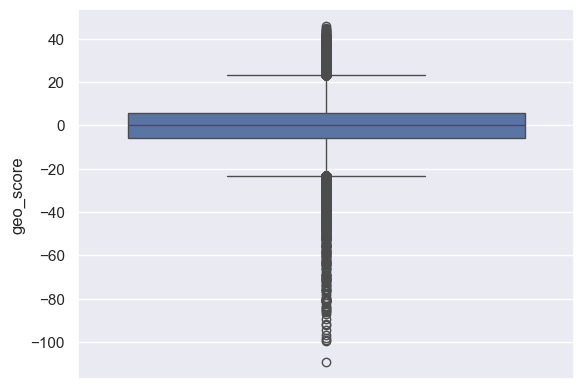

In [20]:
sns.boxplot(y='geo_score', data=geo)

<Axes: ylabel='qsets_normalized_tat'>

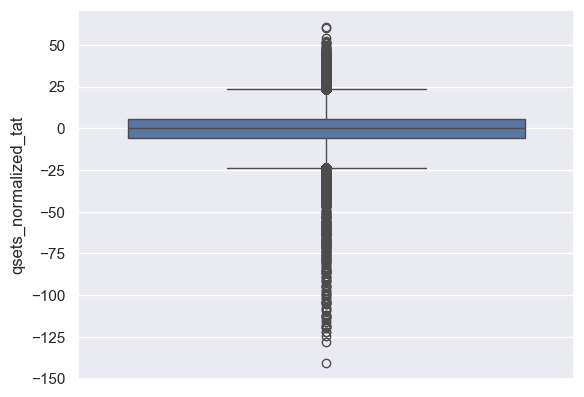

In [21]:
sns.boxplot(y='qsets_normalized_tat', data=qset)

##### Here we have outliers in both datasets so we con't use the mean to fill the null values, We need to use the median 

#### Filling the null values

In [24]:
qset['qsets_normalized_tat']=qset['qsets_normalized_tat'].fillna(qset['qsets_normalized_tat'].median())
geo['geo_score']=geo['geo_score'].fillna(geo['geo_score'].median())

In [25]:
print('*'* 30,'qset','*'*20)
print(qset.isna().sum()/len(qset)*100)
print('*'* 30,'geo','*'*20)
print(geo.isna().sum()/len(geo)*100)

****************************** qset ********************
id                      0.0
qsets_normalized_tat    0.0
dtype: float64
****************************** geo ********************
id           0.0
geo_score    0.0
dtype: float64


- the missing values imputation is done

- now the merging of data sets

In [28]:
train['Target'].value_counts()

Target
0    227451
1       394
Name: count, dtype: int64

In [29]:
train.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,Dem2,Dem3,Dem4,Dem5,Dem6,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.34,1.010000,0.863333,0.46,0.643333,0.736667,0.756667,0.813333,0.693333,0.666667,0.680000,0.726667,0.606667,1.01,0.933333,0.603333,0.686667,0.673333,-245.75,0
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.81,0.783333,0.190000,0.47,0.613333,0.883333,0.653333,0.463333,0.483333,0.583333,0.716667,0.743333,0.680000,0.69,0.560000,0.670000,0.553333,0.653333,-248.00,0


In [30]:
test.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,Dem2,Dem3,Dem4,Dem5,Dem6,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT
0,146574,Grp229,-0.300000,1.540000,0.22,-0.280000,0.57,0.260000,0.70,1.076667,0.930000,0.156667,0.546667,0.53,0.876667,0.450000,0.370000,0.786667,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500
1,268759,Grp141,0.633333,0.953333,0.81,0.466667,0.91,0.253333,1.04,0.550000,0.543333,0.433333,0.966667,0.76,0.576667,0.653333,0.553333,0.636667,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125


In [31]:
train.shape

(227845, 28)

In [32]:
test.shape

(56962, 27)

#### the difference between two data sets is target columns

In [34]:
# to merge this we need a common column
train['data'] = 'train'
test['data'] = 'test'

In [35]:
# add both the table together
df = pd.concat([train, test],axis=0)

In [36]:
df.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,Dem2,Dem3,Dem4,Dem5,Dem6,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,0.863333,0.460000,0.643333,0.736667,0.756667,0.813333,0.693333,0.666667,0.680000,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,0.190000,0.470000,0.613333,0.883333,0.653333,0.463333,0.483333,0.583333,0.716667,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,0.226667,0.660000,0.730000,0.873333,0.923333,1.223333,0.686667,0.606667,0.690000,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,0.486667,1.096667,0.466667,0.670000,0.526667,0.783333,0.856667,0.716667,0.720000,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,0.516667,0.756667,0.683333,0.296667,0.780000,0.636667,0.783333,0.630000,0.603333,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train


In [37]:
print("*******************Unique ID to the customer****************")
print("qset",qset['id'].nunique())
print("******************")
print("geo", geo['id'].nunique())
print("******************")
print("insatance",insatance['id'].nunique())
print("******************")
print("df", df['id'].nunique())
print("******************")
print()
print()
print("*******************Unique Group to the customer****************")
print()
print()
print("lmbda",lmd['Group'].nunique())
print("******************")
print("df",df['Group'].nunique())
print("******************")

*******************Unique ID to the customer****************
qset 284807
******************
geo 284807
******************
insatance 284807
******************
df 284807
******************


*******************Unique Group to the customer****************


lmbda 1400
******************
df 1400
******************


In [38]:
df.shape

(284807, 29)

#### Here the main problem comes df(train_test_table) have all unique customer details, But where reamining 3 tables contains more data than df ,Because every customer do many transactions so they all regestered.
- so we need to group it according to 'ID'

In [40]:
geo = geo.groupby('id').mean()
insatance = insatance.groupby('id').mean()
qset = qset.groupby('id').mean()

In [41]:
geo.shape

(284807, 1)

In [42]:
insatance.shape

(284807, 1)

In [43]:
qset.shape

(284807, 1)

In [44]:
lmd.shape

(1400, 2)

In [45]:
lmd.head(2)

,Group,lambda_wt
0,Grp936,3.41
1,Grp347,-2.88


In [46]:
#### now we merge the df table with lambda table by grouping the groups 

In [47]:
df = pd.merge(df, lmd, on='Group', how='left')

In [48]:
df.shape

(284807, 30)

### now remaining tables

In [50]:
df=pd.merge(df,qset,on='id',how='left')

In [51]:
df=pd.merge(df,geo,on='id',how='left')

In [52]:
df=pd.merge(df,insatance,on='id',how='left')

In [53]:
df.shape

(284807, 33)

In [54]:
df.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,Dem2,Dem3,Dem4,Dem5,Dem6,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,lambda_wt,qsets_normalized_tat,geo_score,instance_scores
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.34,1.010000,0.863333,0.46,0.643333,0.736667,0.756667,0.813333,0.693333,0.666667,0.680000,0.726667,0.606667,1.01,0.933333,0.603333,0.686667,0.673333,-245.75,0.0,train,-0.13,-0.70,0.256,-0.06
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.81,0.783333,0.190000,0.47,0.613333,0.883333,0.653333,0.463333,0.483333,0.583333,0.716667,0.743333,0.680000,0.69,0.560000,0.670000,0.553333,0.653333,-248.00,0.0,train,0.66,0.14,-0.250,0.52


#### now we need to split the seen(target given) and unseen(target not given) data 

In [56]:
train = df[df['data']=='train']
test = df[df['data']=='test']

In [57]:
train.shape

(227845, 33)

In [58]:
test.shape

(56962, 33)

In [59]:
train.drop(['id','data'],axis=1,inplace=True)

In [60]:
test.drop(['id','Target','data'],axis=1,inplace=True)

In [61]:
train.dtypes

Group                    object
Per1                    float64
Per2                    float64
Per3                    float64
Per4                    float64
Per5                    float64
Per6                    float64
Per7                    float64
Per8                    float64
Per9                    float64
Dem1                    float64
Dem2                    float64
Dem3                    float64
Dem4                    float64
Dem5                    float64
Dem6                    float64
Dem7                    float64
Dem8                    float64
Dem9                    float64
Cred1                   float64
Cred2                   float64
Cred3                   float64
Cred4                   float64
Cred5                   float64
Cred6                   float64
Normalised_FNT          float64
Target                  float64
lambda_wt               float64
qsets_normalized_tat    float64
geo_score               float64
instance_scores         float64
dtype: o

In [62]:
test.dtypes

Group                    object
Per1                    float64
Per2                    float64
Per3                    float64
Per4                    float64
Per5                    float64
Per6                    float64
Per7                    float64
Per8                    float64
Per9                    float64
Dem1                    float64
Dem2                    float64
Dem3                    float64
Dem4                    float64
Dem5                    float64
Dem6                    float64
Dem7                    float64
Dem8                    float64
Dem9                    float64
Cred1                   float64
Cred2                   float64
Cred3                   float64
Cred4                   float64
Cred5                   float64
Cred6                   float64
Normalised_FNT          float64
lambda_wt               float64
qsets_normalized_tat    float64
geo_score               float64
instance_scores         float64
dtype: object

##### we have object(string data type) in the data set it is not recogoncise by the algorithm so we need to change it

In [64]:
train['Group'] = train['Group'].astype('category')
train['Group'] = train['Group'].cat.codes

In [65]:
test['Group'] = test['Group'].astype('category')
test['Group'] = test['Group'].cat.codes

#### spliting the data as x and y

In [67]:
x=train.drop('Target',axis=1)
y=train['Target']

In [68]:
x.shape

(227845, 30)

In [69]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Target, dtype: float64

In [70]:
y=pd.DataFrame(y)

In [71]:
x.head()

,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,Dem2,Dem3,Dem4,Dem5,Dem6,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,lambda_wt,qsets_normalized_tat,geo_score,instance_scores
0,420,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,0.863333,0.460000,0.643333,0.736667,0.756667,0.813333,0.693333,0.666667,0.680000,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,-0.13,-0.700,0.256,-0.06
1,413,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,0.190000,0.470000,0.613333,0.883333,0.653333,0.463333,0.483333,0.583333,0.716667,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.66,0.140,-0.250,0.52
2,523,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,0.226667,0.660000,0.730000,0.873333,0.923333,1.223333,0.686667,0.606667,0.690000,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,-0.51,-0.430,-0.950,1.56
3,452,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,0.486667,1.096667,0.466667,0.670000,0.526667,0.783333,0.856667,0.716667,0.720000,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.72,-0.302,0.490,0.70
4,486,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,0.516667,0.756667,0.683333,0.296667,0.780000,0.636667,0.783333,0.630000,0.603333,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.60,-0.630,0.850,-0.47


#### tarin test split

In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [74]:
y_train['Target'].value_counts()

Target
0.0    181961
1.0       315
Name: count, dtype: int64

In [75]:
y_test['Target'].value_counts()

Target
0.0    45490
1.0       79
Name: count, dtype: int64

### Algorthim Building

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [78]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

      Method Used  Accuracy
0  LogitRegession  0.999166
1           Dtree  0.999100
2         RForest  0.999473
3             XGB  0.999539
4             KNN  0.999034
5             SVM  0.998266
6             NBT  0.977814
7          Voting  0.999451
Axes(0.125,0.11;0.775x0.77)


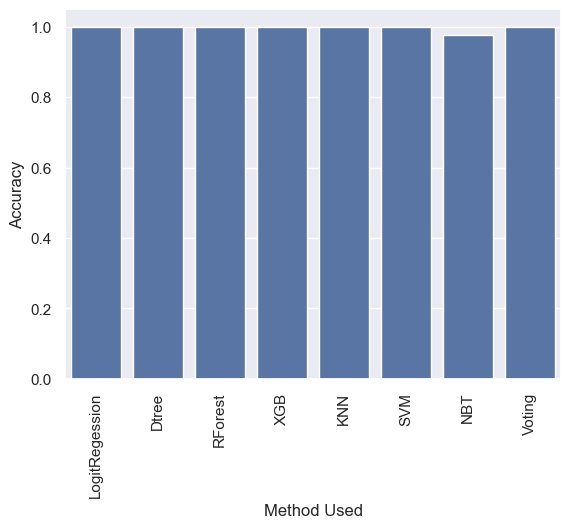

In [79]:
list_met = []
list_accuracy = []

# LogisticRegression
logit = LogisticRegression()
logit = logit.fit(x_train, y_train)
y_pred_lr = logit.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# DecisionTree
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)
y_pred_dt = dtree.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# RandomForest
rforest = RandomForestClassifier()
rforest = rforest.fit(x_train, y_train)
y_pred_rf = rforest.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# XGBoost
xgboost = XGBClassifier()
xgboost = xgboost.fit(x_train, y_train)
y_pred_xg = xgboost.predict(x_test)
accuracy_xg = accuracy_score(y_test, y_pred_xg)


# KNN
knn = KNeighborsClassifier()
knn = knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# SVM
svm = SVC()
svm = svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Naive Based Theorem
nbt = GaussianNB()
nbt = nbt.fit(x_train, y_train)
y_pred_nbt = nbt.predict(x_test)
accuracy_nbt = accuracy_score(y_test, y_pred_nbt)

# Voting Classifier - combining all the above model together by using voting classifier approach
model_evc = VotingClassifier(estimators = [('logit',logit), ('dtree',dtree), ('rforest',rforest),('xgboost',xgboost),
                                           ('knn',knn),('svm',svm),('nbt',nbt)])
model_evc = model_evc.fit(x_train, y_train)
pred_evc = model_evc.predict(x_test)
accuracy_evc = accuracy_score(y_test, pred_evc)

list1 = ['LogitRegession','Dtree','RForest','XGB','KNN','SVM','NBT','Voting']
list2 = [accuracy_lr,accuracy_dt,accuracy_rf,accuracy_xg,accuracy_knn,accuracy_svm,accuracy_nbt,accuracy_evc]
list3 = [logit,dtree,rforest,xgboost,knn,svm,nbt,model_evc]

df_accuracy = pd.DataFrame({"Method Used":list1, "Accuracy":list2})

print(df_accuracy)

chart = sns.barplot(x="Method Used", y="Accuracy", data=df_accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)                          
                               

In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

def evaluate_model(y_test, y_pred):
    print(f"Accuracy      : {accuracy_score(y_test, y_pred)*100:.2f}")
    print(f"Precision     : {precision_score(y_test, y_pred):.2f}")
    print(f"Recall        : {recall_score(y_test, y_pred):.2f}")
    print(f"F1-Score      : {f1_score(y_test, y_pred):.2f}")
    print(f"roc_auc_score : {roc_auc_score(y_test, y_pred):.2f}")
    
print("*"*50)
print("Logistic Regression Evaluation:")
print("*"*50)
evaluate_model(y_test, y_pred_lr)

print("\n")

print("*"*50)
print("Decision Tree Evaluation:")
print("*"*50)
evaluate_model(y_test, y_pred_dt)

print("\n")

print("*"*50)
print("Random Forest Evaluation:")
print("*"*50)
evaluate_model(y_test, y_pred_rf)

print("\n")

print("*"*50)
print("XGBoost Evaluation:")
print("*"*50)
evaluate_model(y_test, y_pred_xg)

print("\n")

print("*"*50)
print("Support Vector Machine Evaluation:")
print("*"*50)
evaluate_model(y_test, y_pred_svm)

print("\n")

print("*"*50)
print("Naive Bayes Evaluation:")
print("*"*50)
evaluate_model(y_test, y_pred_nbt)

print("\n")

print("*"*50)
print("K-Nearest Neighbors Evaluation:")
print("*"*50)
evaluate_model(y_test, y_pred_knn)

print("\n")

print("*"*50)
print("Voting Classifier")
print("*"*50)
evaluate_model(y_test,pred_evc)

**************************************************
Logistic Regression Evaluation:
**************************************************
Accuracy      : 99.92
Precision     : 0.87
Recall        : 0.61
F1-Score      : 0.72
roc_auc_score : 0.80


**************************************************
Decision Tree Evaluation:
**************************************************
Accuracy      : 99.91
Precision     : 0.74
Recall        : 0.75
F1-Score      : 0.74
roc_auc_score : 0.87


**************************************************
Random Forest Evaluation:
**************************************************
Accuracy      : 99.95
Precision     : 0.95
Recall        : 0.73
F1-Score      : 0.83
roc_auc_score : 0.87


**************************************************
XGBoost Evaluation:
**************************************************
Accuracy      : 99.95
Precision     : 0.95
Recall        : 0.77
F1-Score      : 0.85
roc_auc_score : 0.89


**************************************************
Suppo

In [81]:
y_p = knn.predict(x_train)

In [82]:
print(accuracy_score(y_train, y_p))
print("*****************")
print(accuracy_score(y_test, y_pred_knn))

0.9990124865588448
*****************
0.9990344313019817


In [83]:
final_output = rforest.predict(test)

In [85]:
#final_output[0].value_counts()

In [89]:
#final_output.head()

In [91]:
final_output=pd.DataFrame(final_output)

In [93]:
final_output.to_csv("Final_Target_Value.csv")

In [95]:
#final = pd.concat([test, final_output],axis=1)

In [99]:
final = pd.concat([test.reset_index(drop=True), final_output.reset_index(drop=True)], axis=1)


In [101]:
final.shape

(56962, 31)

In [109]:
final.head()

,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,Dem2,Dem3,Dem4,Dem5,Dem6,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,lambda_wt,qsets_normalized_tat,geo_score,instance_scores,Target
0,277,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,0.930000,0.156667,0.546667,0.530000,0.876667,0.450000,0.370000,0.786667,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,0.76,-0.426,0.25,-0.04,0.0
1,180,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,0.543333,0.433333,0.966667,0.760000,0.576667,0.653333,0.553333,0.636667,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,0.18,-0.620,0.43,-0.77,0.0
2,231,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,0.593333,1.250000,0.826667,0.826667,0.653333,0.663333,0.453333,0.626667,0.756667,0.953333,0.623333,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200,0.39,-0.406,1.32,0.11,0.0
3,485,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,1.156667,1.186667,0.900000,0.433333,0.230000,1.323333,0.403333,0.480000,0.460000,0.260000,0.800000,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875,1.80,0.374,-2.11,0.33,0.0
4,504,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,1.476667,1.213333,0.853333,0.583333,0.850000,1.090000,0.550000,0.706667,0.740000,0.823333,0.670000,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200,1.89,-0.130,-2.11,-0.37,0.0


In [107]:
final.rename(columns={0: 'Target'}, inplace=True)


In [113]:
df.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,Dem2,Dem3,Dem4,Dem5,Dem6,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,lambda_wt,qsets_normalized_tat,geo_score,instance_scores
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,0.863333,0.460000,0.643333,0.736667,0.756667,0.813333,0.693333,0.666667,0.680000,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train,-0.13,-0.700,0.256,-0.06
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,0.190000,0.470000,0.613333,0.883333,0.653333,0.463333,0.483333,0.583333,0.716667,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train,0.66,0.140,-0.250,0.52
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,0.226667,0.660000,0.730000,0.873333,0.923333,1.223333,0.686667,0.606667,0.690000,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.51,-0.430,-0.950,1.56
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,0.486667,1.096667,0.466667,0.670000,0.526667,0.783333,0.856667,0.716667,0.720000,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.72,-0.302,0.490,0.70
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,0.516667,0.756667,0.683333,0.296667,0.780000,0.636667,0.783333,0.630000,0.603333,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.60,-0.630,0.850,-0.47
